# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Fatemeh.Naghash
2.   Student Number: 400206381


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [98]:
dataset = pd.read_csv("/content/drive/MyDrive/csv/data01.csv")

# implement the split part
 #name them: x_train, x_test, y_train, y_test
x_train=np.expand_dims((dataset[:int(0.8*len(dataset))]['X']).values,axis=1)
y_train=np.expand_dims((dataset[:int(0.8*len(dataset))]['Y']).values,axis=1)

x_test=(dataset[int(0.8*len(dataset)):]['X']).values
y_test=(dataset[int(0.8*len(dataset)):]['Y']).values
#s_f = 0.8
#x = dataset.iloc[:,1].to_numpy()
#y= dataset.iloc[:,-1].to_numpy()
#n_train = math.floor(s_f * x.shape[0])
#n_test = math.ceil((1-s_f) * x.shape[0])
#x_train = x[:n_train]
#y_train = y[:n_train]
#x_test = x[n_train:]
#y_test = y[n_train:]
print("Total Number of rows in train:",np.shape(x_train))
print("Total Number of rows in test:",x_test.shape)


Total Number of rows in train: (400, 1)
Total Number of rows in test: (100,)


### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [99]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.
#A=np.hstack((np.reshape(x_train,(-1,1)),np.ones((x_train.shape[0],1))))
n=len(x_train)
A=np.hstack([x_train, np.ones((n,1))])
print(A.shape)
#lstsq
#solves G*m=d for m
#(G'*G)^{-1}*G'*d=mhat


#mhat,residuals,rank,s=np.linalg.lstsq(A,y_train)

ATA = np.dot(A.T, A)
ATB = np.dot(A.T, y_train)
a=np.linalg.inv(ATA)
mhat=np.dot(a,ATB)
 
print(mhat)



(400, 2)
[[-1.02641738]
 [ 0.81500634]]


In [100]:
predicted_train_y = mhat[0] * x_train + mhat[1]
predicted_test_y = mhat[0] * x_test + mhat[1]


train_error = mean_squared_error(y_train, predicted_train_y)
test_error = mean_squared_error(y_test, predicted_test_y)
print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.3246776301777423
MSE test error: 0.3544951192130029


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

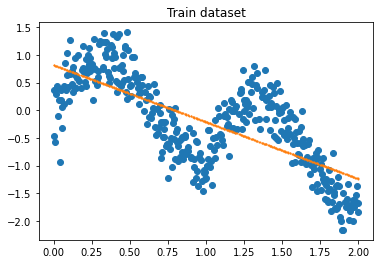

In [101]:
plt.scatter(x_train, y_train)

plt.scatter(x_train,mhat[0] * x_train + mhat[1] , s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

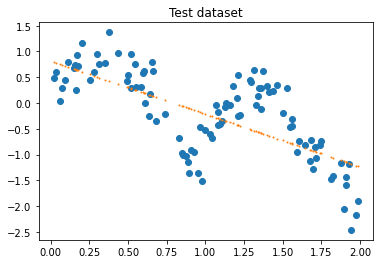

In [94]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, mhat[0]*x_test +mhat[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?No  

What about the line you drew in the last part?NO

Was it appropriate for the dataset?NO
From the last graph, it is clear that the prediction was not made correctly and the graph remained constant with the data changes

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

The performance of this one is better than the linear regression model because the weighting of the coefficients increases the flexibility of the prediction and makes the prediction more accurate.

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [102]:


def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
  
    W = np.mat(np.eye(l))
    for i ,xi in enumerate(train_dataset):
        W[i, i] = np.exp(np.dot((xi-the_query_point),(xi-the_query_point).T)/(-2*(hyperparameter**2)))
    return W



Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [103]:



def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X =np.hstack((train_X,np.ones((l,1))))                                        # np.hstack((train_X,np.ones((l,1))))
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)
   
 
    theta =np.linalg.pinv(X.T*(W*X))*(X.T*(W*train_Y))
      

    return np.dot(qx, theta)
   

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [104]:
hyperparameter=0.01

predicted_y = [predict(x_train, y_train, query, hyperparameter) for query in x_test]
predicted_y=np.reshape(predicted_y,(-1,1))
error = mean_squared_error(y_test,predicted_y)
print(f"MSE test error: {error}")

MSE test error: 0.0957544740369233


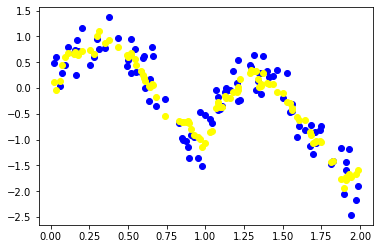

In [72]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test,predicted_y, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

the performance of this model is better because it shows all data changes.The smaller the hyperparameter value, the closer the test data is to the original data

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

-write here-

### Part10:
Implementing the `KNN model`.

In [137]:


class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self,x1,x2):
        distance = np.sqrt(np.sum((x1-x2)**2))
        return distance

    def return_nn_ids(self, sample):
        indices =np.argsort([self.distance(x,sample) for x in self.X])[:self.k]
      
        return indices

    def predict(self, x):
      
        neareest_indices = self.return_nn_ids(x)
        predicted_y =[self.Y[i] for i in   neareest_indices]
        return predicted_y
       # [distance(x,x_train) for x_train in self.X_train]

In [138]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = mean_squared_error(y_test,predicted_y)
    return error, predicted_y

In [139]:
k=1

error_knn, predicted_y = evaluation(k,x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.14793854960365135


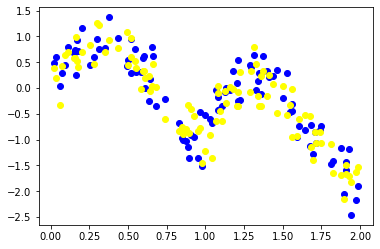

In [140]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.

Did this model perform well (due to the plot and test accuracy)?



Of course, it works better than the linear regression model, but according to the results, its accuracy is not better than Locally Weighted Linear Regression

-write here-